In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Load Dataset

In [2]:
data = pd.read_csv('/Users/candice/Desktop/speed_up/HW/hw1/project1/conversion_project.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [9]:
data[data.duplicated() == True]

,country,age,new_user,source,total_pages_visited,converted
88,US,28,1,Seo,4,0
89,US,25,1,Ads,5,0
110,US,29,0,Ads,5,0
144,US,37,1,Direct,7,0
148,US,19,1,Ads,3,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [10]:
data[data.duplicated() == False]

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
315659,US,35,0,Seo,10,1
315777,Germany,23,0,Ads,8,1
315892,US,47,0,Direct,15,1
316076,UK,43,0,Seo,13,0


In [111]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


# Data cleaning

In [113]:
# check missing values
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

<AxesSubplot:>

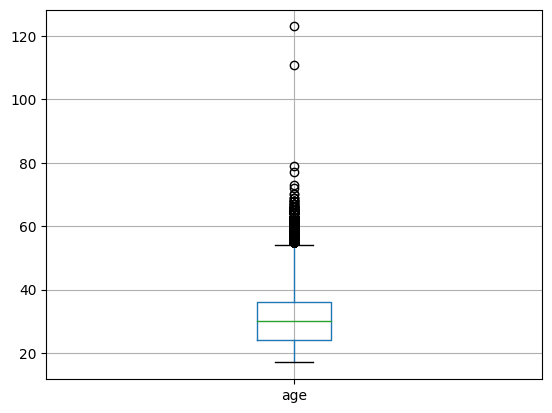

In [114]:
# check outliers using boxplot
data.boxplot(column=['age'])

In [115]:
# drop age who is greater than 100 years old

data.drop(data[data['age'] > 100].index, inplace = True)
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# Exploratory Data Analysis

Q1. what is the user profile?

Text(0, 0.5, 'count of each country')

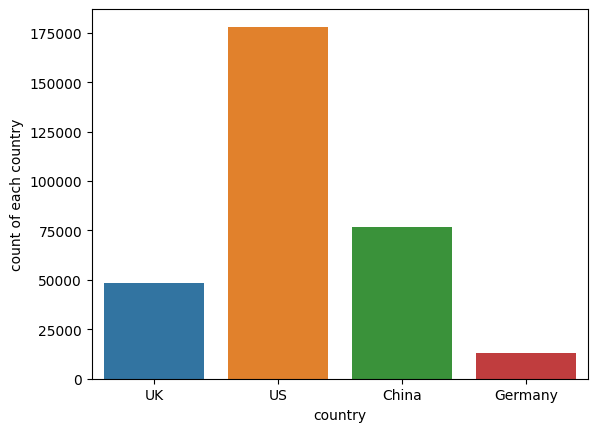

In [52]:
# visualization of country
sns.countplot(x='country', data=data)
plt.xlabel('country')
plt.ylabel('count of each country')

Text(0, 0.5, 'count of age')

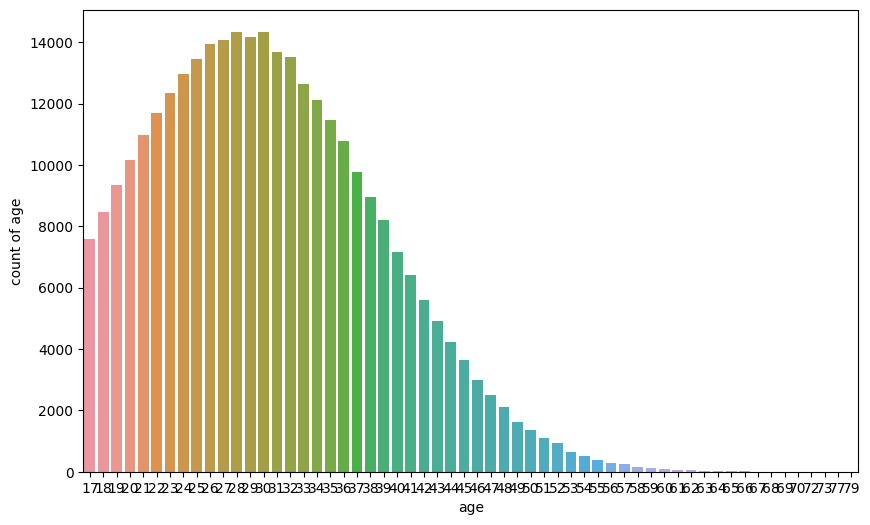

In [54]:
# visualization of age
fig = plt.figure(figsize = (10,6))
sns.countplot(x='age', data=data)
plt.xlabel('age')
plt.ylabel('count of age')

Text(0, 0.5, 'count of new_user')

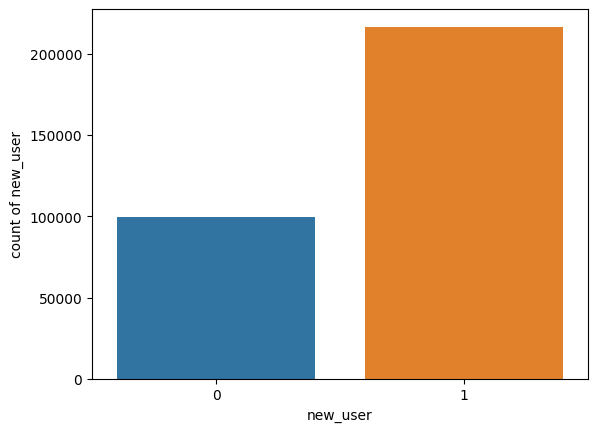

In [67]:
# visualization of new_user
sns.countplot(x='new_user', data=data)
plt.xlabel('new_user')
plt.ylabel('count of new_user')

Text(0, 0.5, 'count of source')

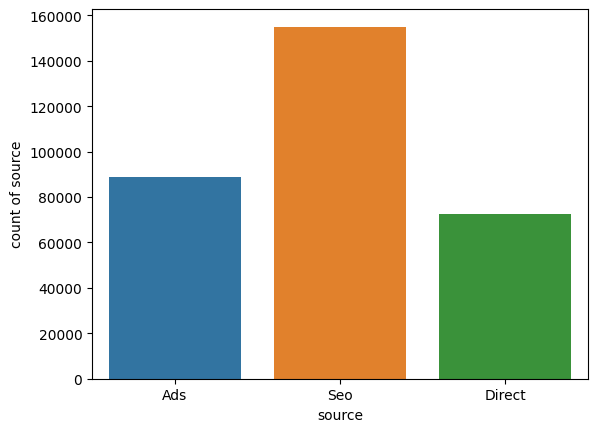

In [58]:
# visualization of source
sns.countplot(x='source', data=data)
plt.xlabel('source')
plt.ylabel('count of source')

Text(0, 0.5, 'count of total_pages_visited')

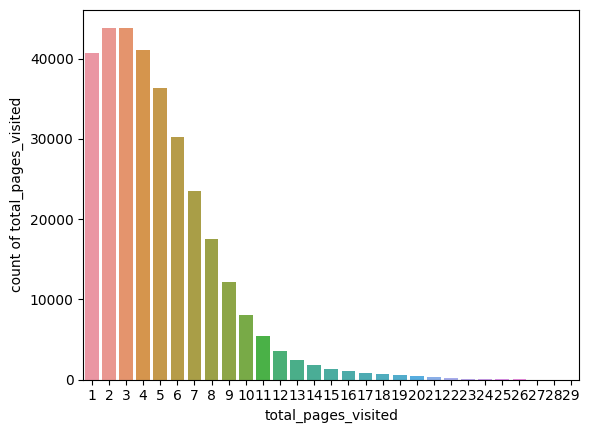

In [59]:
# visualization of total_pages_visited
sns.countplot(x='total_pages_visited', data=data)
plt.xlabel('total_pages_visited')
plt.ylabel('count of total_pages_visited')

Text(0, 0.5, 'count of converted')

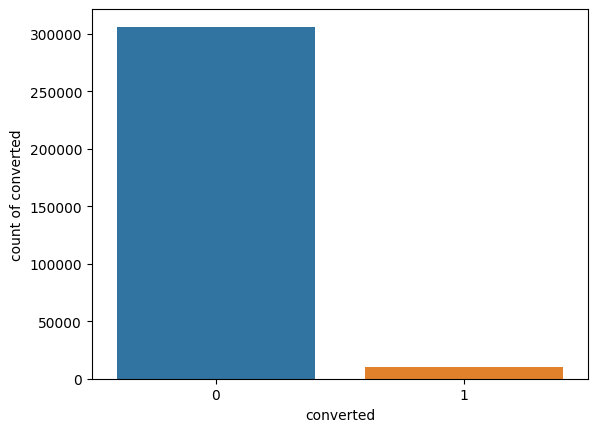

In [68]:
# visualization of converted
sns.countplot(x='converted', data=data)
plt.xlabel('converted')
plt.ylabel('count of converted')

Q2. what is the association between conversion rate and the user profile?

Text(0, 0.5, 'conversion rate')

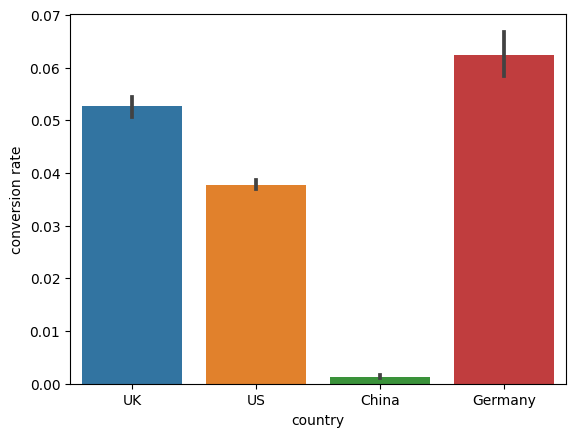

In [72]:
# visualization between conversion rate and country
sns.barplot(x = 'country', y='converted', data=data)
plt.xlabel('country')
plt.ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

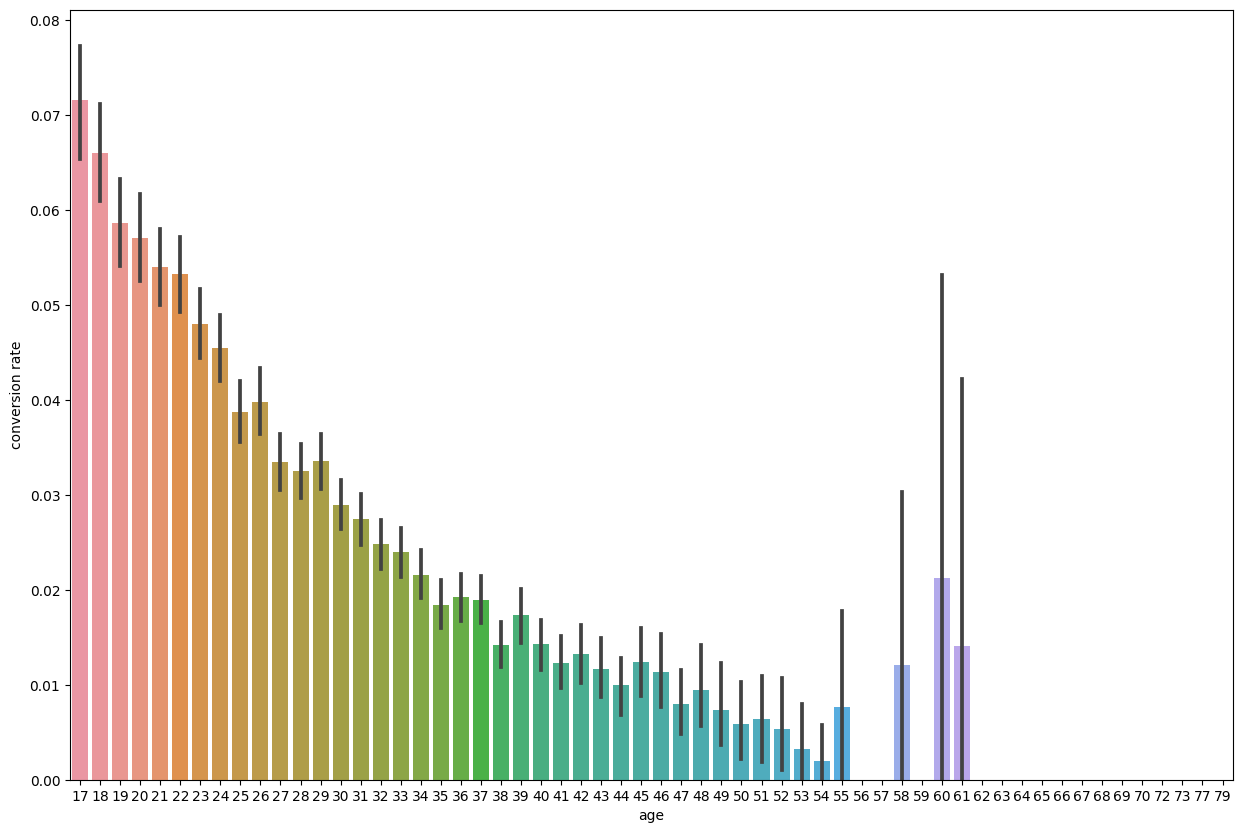

In [92]:
# visualization between conversion rate and age
plt.figure(figsize=(15,10))
sns.barplot(x = 'age', y='converted', data=data)
plt.xlabel('age')
plt.ylabel('conversion rate')
# plt.show()

Text(0, 0.5, 'conversion rate')

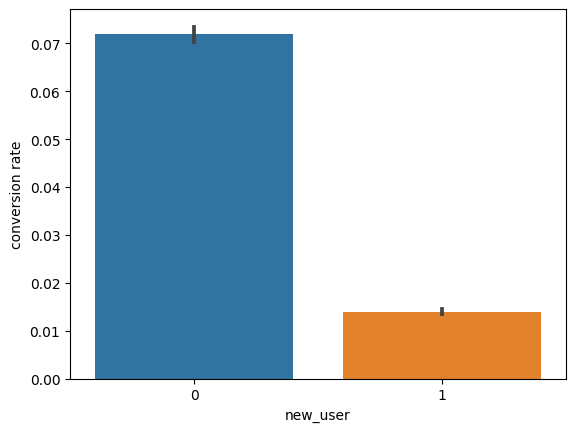

In [78]:
# visualization between conversion rate and new_user
sns.barplot(x = 'new_user', y='converted', data=data)
plt.xlabel('new_user')
plt.ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

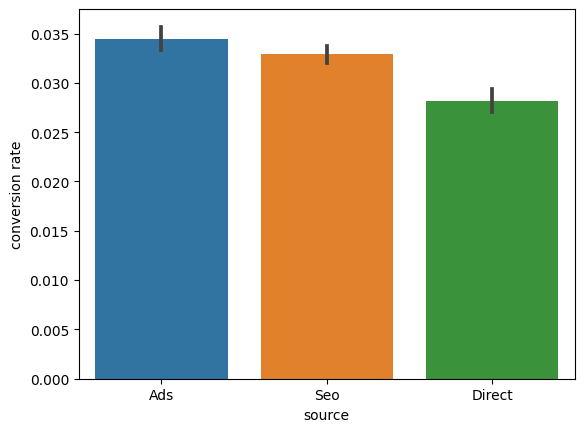

In [79]:
# visualization between conversion rate and source
sns.barplot(x = 'source', y='converted', data=data)
plt.xlabel('source')
plt.ylabel('conversion rate')

Text(0, 0.5, 'conversion rate')

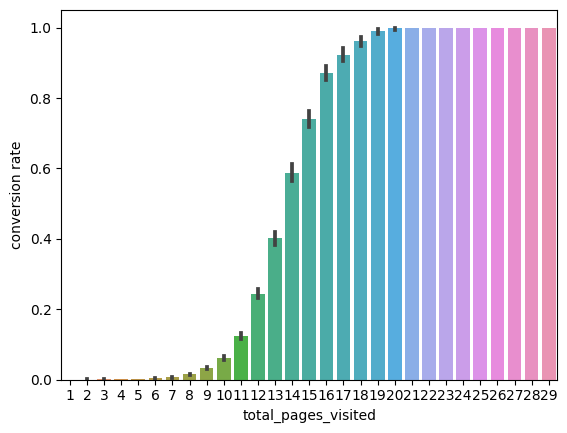

In [80]:
# visualization between conversion rate and total_pages_visited
sns.barplot(x = 'total_pages_visited', y='converted', data=data)
plt.xlabel('total_pages_visited')
plt.ylabel('conversion rate')

Q3.what are some key indicators for a high/low conversion rate?

-- Among all the countries, Germany has the highest conversion rate, China has the lowest conversion rate.  \
-- Among all the ages, the younger the user is, the more likely the user will convert; 17 years old users have the highest conversion rate, 54 years old has the lowest conversion rate. \
-- Among all the users, user created the account during this session has higher conversion rate, users had already an account have lower conversion rate. \
-- Among all the sources, Ads srouce has the highest conversion rate, direct source has the lowest. \
-- Among the total pages vistied, users who vist more pages are more likely to convert.

Q4. what would a group of users with a high conversion rate look like?

Users from Germany, with young age, created the account during the session, and from Ads marketing source with higher total pages visited will have a higher conversion rate. 

# Maching Learning 

Q5. If we wanna run a marketing campaign, what do think could be the target audience?

In [117]:
# use random forest model to find the feature importance

# convert new_user and converted to categorical variables
data['new_user'] = data['new_user'].astype('category')
data['converted'] = data['converted'].astype('category')

# convert country and source to dummy variables
data1 = pd.get_dummies(data, columns = ['country', 'source'])
data1

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,0,1,0,1,0
316197,25,0,4,0,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,0,1,0,0,1


In [118]:
# split X and y to build model
X = data1.drop(['converted'], axis=1)
y = data1['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# build random forest model
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [128]:
# Calculate feature importances
importances = clf.feature_importances_
Importance = pd.DataFrame({'Importance':importances},index = X.columns)
df2 = Importance.sort_values(by = 'Importance',axis = 0, ascending = False)
df2

,Importance
total_pages_visited,0.807621
age,0.114431
new_user,0.037444
country_China,0.022353
country_US,0.003704
country_UK,0.003449
source_Seo,0.002950
source_Direct,0.002850
country_Germany,0.002715
source_Ads,0.002481


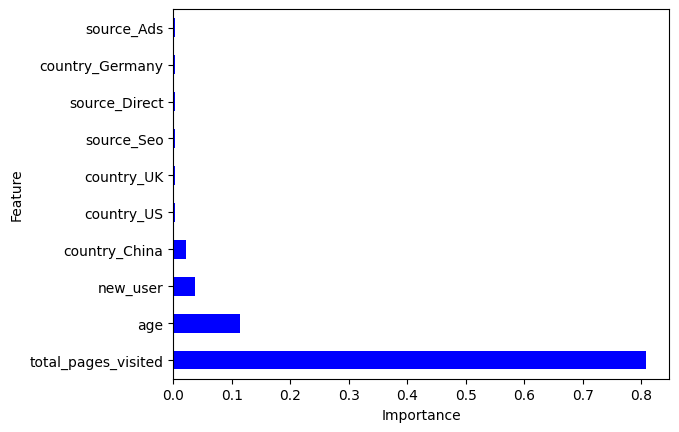

In [132]:
# visualization of feature importance
df2.plot(kind = 'barh',color = 'b',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

From the plot of feature importance, we can easily tell the total number of pages visited is the most important feature to affect the conversion rate. If we want to run a marketing campaign, we can target on the users who are more likely to vist the total pages.

Q6. How do you predict the conversion rate? What model do you wanna use? Implement it

In [140]:
# make prediction on the test dataset with random forest model
y_pred = clf.predict(X_test)

In [141]:
# evaluation of model using model score 
clf.score(X_test,y_test)

0.9845245625131773

In [143]:
# Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91846
           1       0.81      0.68      0.74      3014

    accuracy                           0.98     94860
   macro avg       0.90      0.84      0.86     94860
weighted avg       0.98      0.98      0.98     94860



Q7. After completing your model, think about what would be the next after having the prediction? Eg. how to improve conversion rate based on the prediction?

The next step could be improve the model accuracy score to improve the model. We can drop the least important feature which is source, and only keep the other 4 variables, which are total_pages_visited, new_user, country and age that have high feature importance to build the model.  